In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Logistic Regression on Breast Cancer Dataset (Scikit-Learn)



In this tutorial, we'll use **Logistic Regression** to classify whether a tumor is **malignant (cancerous)** or **benign (non-cancerous)** using real-world medical data.

We'll use the built-in **Breast Cancer Wisconsin Dataset** from `sklearn.datasets`.

This is a binary classification problem — making it perfect for Logistic Regression.


In [ ]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Check shapes
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (569, 30)
Target shape: (569,)


In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


## Dataset Overview

- **Samples**: 569
- **Features**: 30 (numerical measurements like radius, texture, area, smoothness etc.)
- **Target**:
  - 0 → Malignant
  - 1 → Benign

Let’s explore the data before modeling.


In [ ]:
print("Target class distribution:")
y.value_counts()

Target class distribution:


,count
1,357
0,212


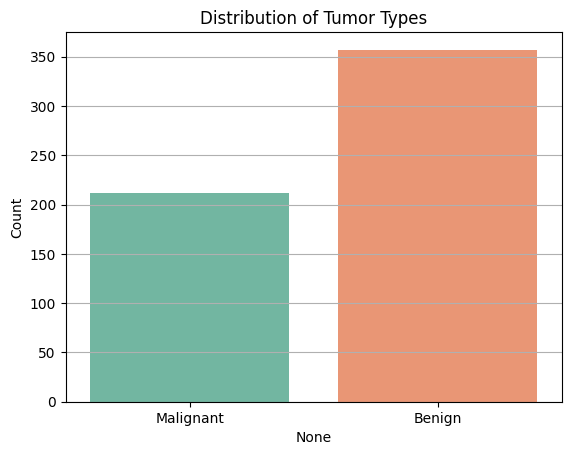

In [ ]:
sns.countplot(x=y.map({0: "Malignant", 1: "Benign"}), palette='Set2')
plt.title("Distribution of Tumor Types")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()

## Preprocessing: Train-Test Split + Feature Scaling

We'll split the dataset into training and test sets, and apply standardization using `StandardScaler`.

Logistic Regression is **sensitive to feature scale**, so this step is important.

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression

We'll now train the model using `LogisticRegression` from scikit-learn.

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation: Accuracy, Confusion Matrix, Classification Report

We'll now evaluate how well our model performs on the **unseen test data**.

In [ ]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))

Accuracy: 0.9737
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

   Malignant       0.98      0.95      0.96        43
      Benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



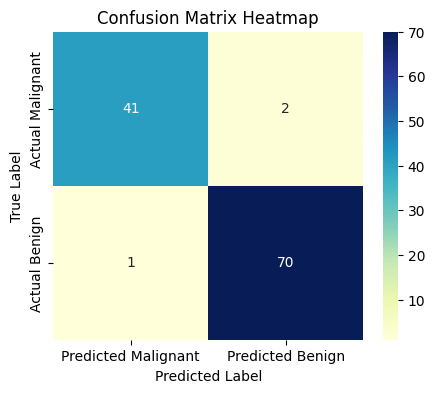

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Predicted Malignant", "Predicted Benign"],
            yticklabels=["Actual Malignant", "Actual Benign"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Logistic Regression — From Scratch



**What Is Logistic Regression?**

**Logistic Regression** is a supervised machine learning algorithm used for **binary classification**.

It models the **probability** that a given input belongs to class 1 (positive class), using a logistic (sigmoid) function to ensure the output lies between 0 and 1.

---
**Why Not Linear Regression for Classification?**

In Linear Regression, we model:

$$
\hat{y} = w_1 x_1 + w_2 x_2 + b
$$

This works for predicting continuous outputs — but:
- It can produce values **less than 0** or **greater than 1**
- There's **no probabilistic interpretation**
- It doesn't handle **classification boundaries**

Hence, Linear Regression is **not suitable** for classification tasks.

---

**Why Logistic Regression?**

We fix these problems by applying the **sigmoid function** to the linear combination:

$$
z = w_1 x_1 + w_2 x_2 + b
\quad \Rightarrow \quad
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

- Output $ \hat{y} $ is always between 0 and 1  
- Interpretable as a **probability** of belonging to class 1  
- Classification decision is made by thresholding:  
  If $ \hat{y} \geq 0.5 $, predict class 1; else class 0

---

**Can Logistic Regression Be Used for Regression?**

Despite its name, **Logistic Regression is *not* used for regression tasks**.  
It is fundamentally a **classification algorithm**, its goal is to **separate categories**, not estimate continuous values.

---
The main objective is to Learn parameters $ w_1, w_2, b $ using **Gradient Descent**, minimizing the **Log Loss (Binary Cross-Entropy)**:

$$
J(w, b) = -\frac{1}{n} \sum_{i=1}^n \left[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right]
$$

## Generate a Toy Binary Classification Dataset

To experiment and understand Logistic Regression effectively, we start with a **clean, simple, and visualizable** dataset.

We'll use `make_classification()` from `sklearn.datasets`, which allows us to:
- Create labeled data for **binary classification**
- Control complexity (features, classes, noise)
- Visualize everything in **2D space**

---

**How `make_classification` Works**

The function generates synthetic classification data with these key parameters:

```python
make_classification(
    n_samples=200,        # Total data points
    n_features=2,         # Total input features
    n_redundant=0,        # No redundant (correlated) features
    n_informative=2,      # All features actually affect the target
    n_clusters_per_class=1,  # Each class forms one cluster
    random_state=42       # Reproducibility
)



In [ ]:
# Generate 2D classification data
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

df.head()

,x1,x2,y
0,-0.872929,0.013042,1
1,1.312935,2.770534,1
2,2.340428,2.420996,1
3,2.294548,-0.404380,1
4,0.944105,0.477241,1


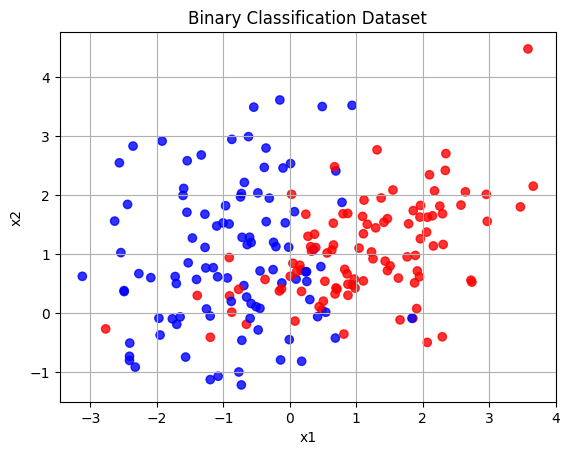

In [ ]:
# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.8)
plt.title("Binary Classification Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

## Initialize Parameters and Define Helper Functions

We now define key components of the Logistic Regression algorithm:

---

**Sigmoid Function**

This function transforms any real-valued input into a value between 0 and 1.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:

- $ z = w_1 x_1 + w_2 x_2 + b $
- Output $ \hat{y} = \sigma(z) \in (0, 1) $
- Interpreted as **probability** of class 1

---

**Prediction Function**

To compute predictions:

- Compute $ z = X \cdot w + b $
- Apply sigmoid to get probabilities $ \hat{y} $

$$
\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)
$$

We can threshold $ \hat{y} $ at 0.5 to make final predictions:

$$
\text{predict class 1 if } \hat{y} \geq 0.5
$$

---

**Binary Cross-Entropy Loss (Log Loss)**

This is the cost function we want to **minimize**:

$$
J(w, b) = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

- Penalizes **wrong confident predictions** heavily
- Encourages the model to output probabilities close to true labels

---

We now implement all of this in code.


In [ ]:
# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction
def predict_proba(X, w, b):
    return sigmoid(np.dot(X, w) + b)

def predict(X, w, b, threshold=0.5):
    return (predict_proba(X, w, b) >= threshold).astype(int)

# Binary Cross-Entropy Loss
def log_loss(y_true, y_prob):
    epsilon = 1e-15
    y_prob = np.clip(y_prob, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

# Initialize weights and bias
np.random.seed(1)
w = np.random.randn(2)
b = 0.0

## Train Using Gradient Descent
---

**Why Do We Use Gradient Descent?**

In Logistic Regression, we want to find the best parameters $w_1, w_2, b$ such that the model's predicted probabilities match the actual labels $y$.

---

**Why Not Closed-Form Like in Linear Regression?**

Unlike Linear Regression, Logistic Regression uses the **sigmoid** and **log loss** functions:

- These functions are **non-linear and non-convex** in a way that **prevents solving with a simple formula**.
- There is **no closed-form solution** for minimizing the log loss.

---

**Why Gradient Descent?**

Gradient Descent is an **iterative optimization algorithm** that:

- Starts with **random parameter values**
- Computes the **gradient (slope)** of the loss function
- Updates parameters in the **direction of steepest descent** (i.e., opposite to the gradient)

This continues until we reach the **minimum of the loss function**, ideally where the model is making the best predictions.

---

**How Gradient Descent Works**

At each step:
1. Compute predictions: $\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$  
2. Compute the log loss between $\hat{y}$ and $y$  
3. Compute gradients:

$$
\frac{\partial J}{\partial w_j} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \cdot x_{ij}
\qquad
\frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)
$$

4. Update weights and bias:

$$
w_j = w_j - \alpha \cdot \frac{\partial J}{\partial w_j}
\qquad
b = b - \alpha \cdot \frac{\partial J}{\partial b}
$$

Where:
- $\alpha$ is the learning rate
- The gradients point in the direction **we should not go** — so we subtract them to minimize loss

---


In [ ]:
def train_logistic_regression(X, y, lr=0.1, epochs=1000):
    n_samples, n_features = X.shape
    w = np.random.randn(n_features)
    b = 0.0
    loss_history = []

    for epoch in range(epochs):
        # Predictions
        y_prob = sigmoid(np.dot(X, w) + b)
        error = y_prob - y

        # Gradients
        dw = (1 / n_samples) * np.dot(X.T, error)
        db = (1 / n_samples) * np.sum(error)

        # Update
        w -= lr * dw
        b -= lr * db

        # Compute and store loss
        loss = log_loss(y, y_prob)
        loss_history.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w}, b = {b:.4f}")

    return w, b, loss_history

In [ ]:
w, b, loss_history = train_logistic_regression(X, y, lr=0.1, epochs=1000)

Epoch 0: Loss = 1.3164, w = [-0.45282046 -1.03152854], b = 0.0193
Epoch 100: Loss = 0.3772, w = [ 1.4393163  -0.34657506], b = 0.2121
Epoch 200: Loss = 0.3678, w = [ 1.72522464 -0.38482495], b = 0.1804
Epoch 300: Loss = 0.3664, w = [ 1.83857729 -0.40998355], b = 0.1809
Epoch 400: Loss = 0.3661, w = [ 1.89097194 -0.42633569], b = 0.1887
Epoch 500: Loss = 0.3660, w = [ 1.91692303 -0.43715013], b = 0.1968
Epoch 600: Loss = 0.3659, w = [ 1.93035896 -0.44431668], b = 0.2035
Epoch 700: Loss = 0.3659, w = [ 1.93756435 -0.4490537 ], b = 0.2084
Epoch 800: Loss = 0.3659, w = [ 1.9415504  -0.45217446], b = 0.2120
Epoch 900: Loss = 0.3659, w = [ 1.94381882 -0.4542243 ], b = 0.2144


## Make Predictions on the Dataset

Now that we have the trained model parameters $w$ and $b$, we can make predictions:

---

**Predict Probabilities**

We compute:

$$
\hat{y}_i = \sigma(w_1 x_{i1} + w_2 x_{i2} + b)
$$

This gives the **probability** of each sample being in **class 1**.

---

**Predict Final Labels**

To convert probabilities into class labels:

- If $\hat{y}_i \geq 0.5$, predict **class 1**
- Else, predict **class 0**

$$
\text{Final prediction} =
\begin{cases}
1 & \text{if } \hat{y} \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

We’ll implement both next.

In [ ]:
# Predict probabilities using trained weights and bias
y_probs = sigmoid(np.dot(X, w) + b)

# Predict class labels using threshold
y_pred = (y_probs >= 0.5).astype(int)

# Show first 10 results
results = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'True Label': y,
    'Predicted Prob': y_probs.round(3),
    'Predicted Label': y_pred
})

results.head()

,x1,x2,True Label,Predicted Prob,Predicted Label
0,-0.872929,0.013042,1,0.184,0
1,1.312935,2.770534,1,0.819,1
2,2.340428,2.420996,1,0.975,1
3,2.294548,-0.404380,1,0.992,1
4,0.944105,0.477241,1,0.862,1


## Visualize Loss Curve

We now plot how the log loss reduces over epochs.


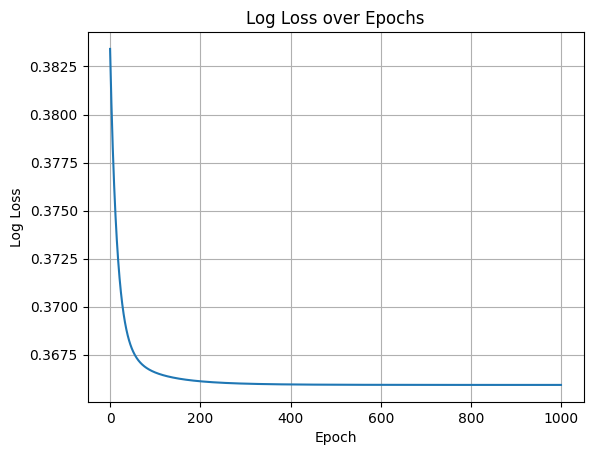

In [ ]:
plt.plot(loss_history)
plt.title("Log Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()

### Visualize DB



We'll visualize the line where:

$$
w_1 x_1 + w_2 x_2 + b = 0 \Rightarrow \hat{y} = 0.5
$$

This separates class 0 from class 1.

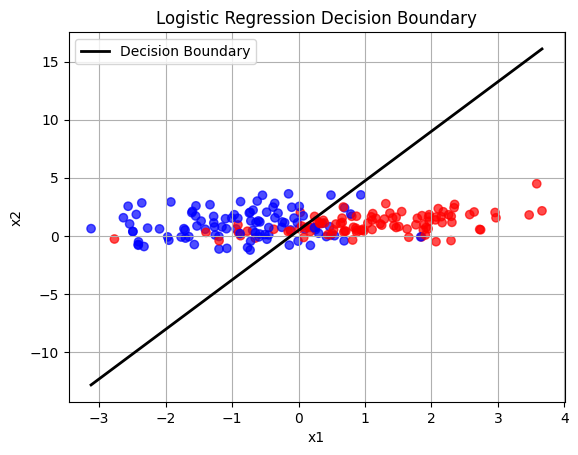

In [ ]:
# Decision boundary: w1*x1 + w2*x2 + b = 0 ⇒ x2 = -(w1*x1 + b)/w2
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_vals = -(w[0] * x1_vals + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.plot(x1_vals, x2_vals, color='black', linewidth=2, label='Decision Boundary')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

## Model Evaluation — Accuracy and Confusion Matrix

Once the model makes predictions, we need to **evaluate how well it performed**. Two standard tools for binary classification are:

---

**Accuracy**

Accuracy measures the percentage of correct predictions:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Where:
- **TP** = True Positives (predicted 1 and actual is 1)  
- **TN** = True Negatives (predicted 0 and actual is 0)  
- **FP** = False Positives (predicted 1 but actual is 0)  
- **FN** = False Negatives (predicted 0 but actual is 1)

---

**Confusion Matrix**

A confusion matrix is a 2×2 table that shows the number of:
- Correct and incorrect predictions
- Separated by class (0 vs 1)

|              | Predicted 0 | Predicted 1 |
|--------------|-------------|-------------|
| **Actual 0** | TN          | FP          |
| **Actual 1** | FN          | TP          |

This helps understand **not just how many errors**, but **what kind of errors** the model makes.

---

In [ ]:
y_pred = predict(X, w, b)
acc = accuracy_score(y, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Accuracy: 0.8400
Confusion Matrix:
[[83 17]
 [15 85]]


## Compare with Sklearn's LogisticRegression

Let’s fit the same data using `sklearn` and compare weights and predictions.


In [ ]:
model = LogisticRegression()
model.fit(X, y)

print("Sklearn Coefficients:")
print(f"w1 = {model.coef_[0][0]:.4f}, w2 = {model.coef_[0][1]:.4f}, b = {model.intercept_[0]:.4f}")

Sklearn Coefficients:
w1 = 1.8177, w2 = -0.4093, b = 0.1873


### Make Predictions Using Sklearn's Model

Now we'll use the `LogisticRegression` model from `sklearn` to:

- Predict **class probabilities**
- Predict **class labels**

This allows us to compare the results of our manual implementation with sklearn's.

In [ ]:
# Predict probabilities and class labels using sklearn model
y_probs_sklearn = model.predict_proba(X)[:, 1]  # Probability of class 1
y_pred_sklearn = model.predict(X)

# Display a comparison with manual model
res = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'True Label': y,
    'Manual Prob': y_probs.round(3),
    'Sklearn Prob': y_probs_sklearn.round(3),
    'Manual Pred': y_pred,
    'Sklearn Pred': y_pred_sklearn
})

res.head()

,x1,x2,True Label,Manual Prob,Sklearn Prob,Manual Pred,Sklearn Pred
0,-0.872929,0.013042,1,0.184,0.197,0,0
1,1.312935,2.770534,1,0.819,0.808,1,1
2,2.340428,2.420996,1,0.975,0.969,1,1
3,2.294548,-0.404380,1,0.992,0.989,1,1
4,0.944105,0.477241,1,0.862,0.847,1,1


## Summary: Logistic Regression

- Used logistic function to model probability of class 1
- Trained using gradient descent to minimize log loss
- Visualized loss curve and decision boundary
- Accuracy and confusion matrix used to evaluate performance
- Compared our model with sklearn’s built-in implementation

Logistic Regression is a **foundational model** in classification and a key building block for:
- Softmax/Multiclass classification
- Neural networks
- Probabilistic modeling